In [1]:
import sys
print("Python Executable:", sys.executable)
print("Python Version:", sys.version)
print("Python Paths:", sys.path)

Python Executable: c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\python.exe
Python Version: 3.12.4 (tags/v3.12.4:8e8a4ba, Jun  6 2024, 19:30:16) [MSC v.1940 64 bit (AMD64)]
Python Paths: ['c:\\Users\\BalintStewart\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip', 'c:\\Users\\BalintStewart\\AppData\\Local\\Programs\\Python\\Python312\\DLLs', 'c:\\Users\\BalintStewart\\AppData\\Local\\Programs\\Python\\Python312\\Lib', 'c:\\Users\\BalintStewart\\AppData\\Local\\Programs\\Python\\Python312', '', 'C:\\Users\\BalintStewart\\AppData\\Roaming\\Python\\Python312\\site-packages', 'C:\\Users\\BalintStewart\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32', 'C:\\Users\\BalintStewart\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32\\lib', 'C:\\Users\\BalintStewart\\AppData\\Roaming\\Python\\Python312\\site-packages\\Pythonwin', 'c:\\Users\\BalintStewart\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages']


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import json
# For data splitting
from sklearn.model_selection import train_test_split, cross_val_score

# For scaling
from sklearn.preprocessing import StandardScaler

# For modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# For evaluation
from sklearn.metrics import mean_squared_error, r2_score

# For pipelines
from sklearn.pipeline import Pipeline

# For GridSearch
from sklearn.model_selection import GridSearchCV

# Import additional estimators
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.pipeline import make_pipeline




In [3]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


In [4]:
df = pd.read_csv('data/auto_scout_final.csv')
# Create features and targey variable
X = df.drop('price', axis = 1)
y = df['price']

In [5]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [6]:
# Standard scaler
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train) # train the scalar on the train dataset
X_test_scaled = standard_scaler.transform(X_test) # transform test datasets, make sure you don't fit to test data though!

Run and initial pass of all the major types of estimators (not fine-tuned) on the data and compare performance on train and test datasets. Try unscaled data first:

In [7]:
# empty dict to store evaluation results
results = {}

models = {'SVR': SVR(),
          'Random Forest': RandomForestRegressor(),
          'Gradient Boost': GradientBoostingRegressor(),
          'Lasso Regression': Lasso(),
          'XG Boost': XGBRegressor(),
          'Light GBM': LGBMRegressor(),
          'Cat Boost': CatBoostRegressor()}

for model_name, model in models.items():
    #unscaled data
    model.fit(X_train, y_train)
    # make predictions on the training data and the test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Gather evaluation metrics mean_squared_error and r2_score on both train and test datasets
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_MSE = mean_squared_error(y_train, y_train_pred)
    test_MSE = mean_squared_error(y_test, y_test_pred)
    train_RMSE = np.sqrt(train_MSE)
    test_RMSE = np.sqrt(test_MSE)
    # put these results into my results dict
    results[model_name] = {
        'Train R^2':train_r2,
        'Test R^2':test_r2,
        'Train RMSE':train_RMSE,
        'Test RMSE': test_RMSE
    }

# convert dict into df
results_unscaled = pd.DataFrame(results)
    

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 11935, number of used features: 144
[LightGBM] [Info] Start training from score 18077.209384
Learning rate set to 0.060578
0:	learn: 7136.8483789	total: 154ms	remaining: 2m 34s
1:	learn: 6831.5698396	total: 158ms	remaining: 1m 18s
2:	learn: 6546.2090806	total: 162ms	remaining: 53.8s
3:	learn: 6274.9304981	total: 166ms	remaining: 41.2s
4:	learn: 6017.6588377	total: 170ms	remaining: 33.8s
5:	learn: 5783.1193251	total: 173ms	remaining: 28.7s
6:	learn: 5562.3095406	total: 177ms	remaining: 25.1s
7:	learn: 5354.8152835	total: 181ms	remaining: 22.4s
8:	learn: 5154.6438928	total: 186ms	remaining: 20.5s


In [8]:
results_unscaled.T

,Train R^2,Test R^2,Train RMSE,Test RMSE
SVR,0.055281,0.062925,7252.321013,6904.640536
Random Forest,0.993645,0.951986,594.828246,1562.916934
Gradient Boost,0.941567,0.929782,1803.667987,1890.073716
Lasso Regression,0.899707,0.890865,2362.981372,2356.329187
XG Boost,0.987915,0.956820,820.251350,1482.156908
Light GBM,0.972460,0.952569,1238.256260,1553.413994
Cat Boost,0.982478,0.961404,987.686965,1401.285791


Now compare performance on the scaled data 

In [9]:
# empty dict to store evaluation results
results = {}

models = {'SVR': SVR(),
          'Random Forest': RandomForestRegressor(),
          'Gradient Boost': GradientBoostingRegressor(),
          'Lasso Regression': Lasso(),
          'XG Boost': XGBRegressor(),
          'Light GBM': LGBMRegressor(),
          'Cat Boost': CatBoostRegressor()}

for model_name, model in models.items():
    #unscaled data
    model.fit(X_train_scaled, y_train)
    # make predictions on the training data and the test data
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    # Gather evaluation metrics mean_squared_error and r2_score on both train and test datasets
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_MSE = mean_squared_error(y_train, y_train_pred)
    test_MSE = mean_squared_error(y_test, y_test_pred)
    train_RMSE = np.sqrt(train_MSE)
    test_RMSE = np.sqrt(test_MSE)
    # put these results into my results dict
    results[model_name] = {
        'Train R^2 scaled':train_r2,
        'Test R^2 scaled':test_r2,
        'Train RMSE scaled':train_RMSE,
        'Test RMSE scaled': test_RMSE
    }

# convert dict into df
results_scaled = pd.DataFrame(results)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 11935, number of used features: 144
[LightGBM] [Info] Start training from score 18077.209384
Learning rate set to 0.060578
0:	learn: 7136.8483789	total: 3.85ms	remaining: 3.85s
1:	learn: 6831.5698396	total: 8.03ms	remaining: 4.01s
2:	learn: 6546.2090806	total: 12ms	remaining: 4s
3:	learn: 6274.9304981	total: 16.3ms	remaining: 4.06s
4:	learn: 6017.6588377	total: 20.4ms	remaining: 4.05s
5:	learn: 5783.1193251	total: 24.1ms	remaining: 3.99s
6:	learn: 5562.3095406	total: 28.3ms	remaining: 4.02s
7:	learn: 5354.8152835	total: 32.3ms	remaining: 4s
8:	learn: 5154.6438928	total: 35.9ms	remaining: 3.95s
9:	learn: 4968.6248113	total: 39.6ms	remaining: 3.92s
10:	learn: 4795.2076091	tot

In [10]:
# Combine both unscaled and scaled results into one DataFrame, without duplicating indices
results_combined = pd.concat([results_unscaled.T, results_scaled.T], axis=1)

# Rename the columns appropriately
results_combined.columns = ['Train R^2', 'Test R^2', 'Train RMSE', 'Test RMSE', 
                            'Train R^2 scaled', 'Test R^2 scaled', 'Train RMSE scaled', 'Test RMSE scaled']

# Reset index to get the model names in a column
results_combined.reset_index(inplace=True)
results_combined.rename(columns={'index': 'Model'}, inplace=True)

# Create two separate DataFrames: one for R^2 and one for RMSE
r2_results = results_combined[['Model', 'Train R^2', 'Test R^2', 'Train R^2 scaled', 'Test R^2 scaled']]
rmse_results = results_combined[['Model', 'Train RMSE', 'Test RMSE', 'Train RMSE scaled', 'Test RMSE scaled']]



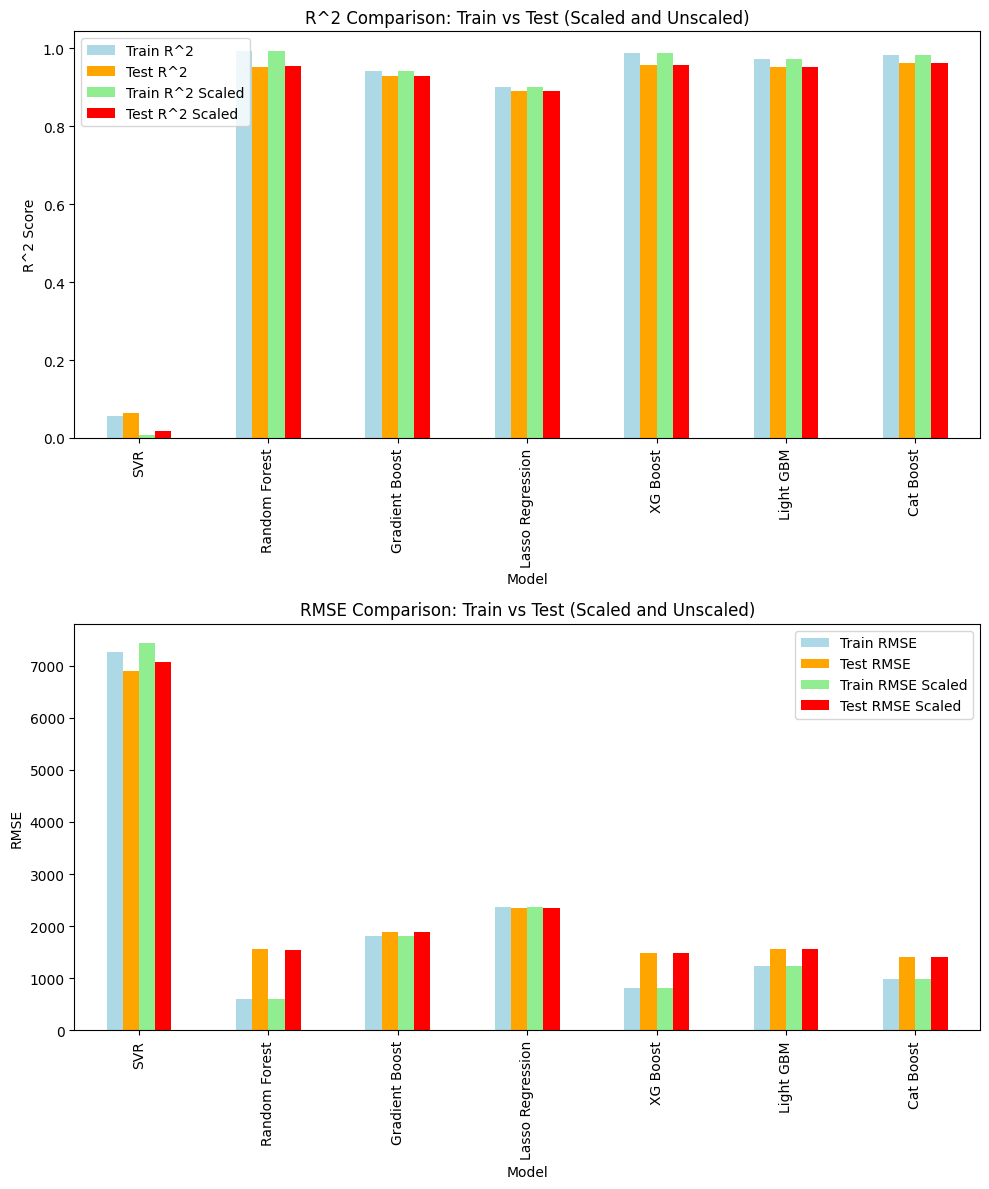

In [11]:
# Plot a barplot of the R2 and RMSE evaluation results
# Plotting Train/Test R^2 and Train/Test RMSE in two barplots for easy comparison

# Plot R^2 comparison
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot R^2
r2_results.plot(x='Model', kind='bar', ax=axs[0], color=['lightblue', 'orange', 'lightgreen', 'red'])
axs[0].set_title('R^2 Comparison: Train vs Test (Scaled and Unscaled)')
axs[0].set_ylabel('R^2 Score')
axs[0].legend(['Train R^2', 'Test R^2', 'Train R^2 Scaled', 'Test R^2 Scaled'])

# Plot RMSE
rmse_results.plot(x='Model', kind='bar', ax=axs[1], color=['lightblue', 'orange', 'lightgreen', 'red'])
axs[1].set_title('RMSE Comparison: Train vs Test (Scaled and Unscaled)')
axs[1].set_ylabel('RMSE')
axs[1].legend(['Train RMSE', 'Test RMSE', 'Train RMSE Scaled', 'Test RMSE Scaled'])

plt.tight_layout()
plt.show()

Scaling the data doesn't seem to affect performance across these models. XG Boost is best performing model, test RMSE = 1482, R^2 = 0.957

Log transforming the target variable improved linear regression a bit, can it improve the other models too?

In [12]:
# Apply log transformation to the target variable
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [13]:
# empty dict to store evaluation results
results = {}

models = {'SVR': SVR(),
          'Random Forest': RandomForestRegressor(),
          'Gradient Boost': GradientBoostingRegressor(),
          'Lasso Regression': Lasso(),
          'XG Boost': XGBRegressor(),
          'Light GBM': LGBMRegressor(),
          'Cat Boost': CatBoostRegressor()}

for model_name, model in models.items():
    #unscaled data
    model.fit(X_train, y_train_log)
    # make predictions on the training data and the test data
    y_train_pred_log = model.predict(X_train)
    y_test_pred_log = model.predict(X_test)
    # Inverse log transform the predictions and the true values to original scale, so can compare RMSE values across log and non-transformed target variable
    y_train_pred_original = np.exp(y_train_pred_log)
    y_test_pred_original = np.exp(y_test_pred_log)
    y_train_original = np.exp(y_train_log)
    y_test_original = np.exp(y_test_log)
    # Gather evaluation metrics mean_squared_error and r2_score on both train and test datasets
    train_r2 = r2_score(y_train_log, y_train_pred_log)
    test_r2 = r2_score(y_test_log, y_test_pred_log)
    train_MSE = mean_squared_error(y_train_original, y_train_pred_original)
    test_MSE = mean_squared_error(y_test_original, y_test_pred_original)
    train_RMSE = np.sqrt(train_MSE)
    test_RMSE = np.sqrt(test_MSE)
    # put these results into my results dict
    results[model_name] = {
        'Train R^2 log':train_r2,
        'Test R^2 log':test_r2,
        'Train RMSE log':train_RMSE,
        'Test RMSE log': test_RMSE
    }

# convert dict into df
results_logTarget = pd.DataFrame(results).T


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 11935, number of used features: 144
[LightGBM] [Info] Start training from score 9.722689
Learning rate set to 0.060578
0:	learn: 0.3822262	total: 3.67ms	remaining: 3.67s
1:	learn: 0.3645604	total: 8.24ms	remaining: 4.11s
2:	learn: 0.3496070	total: 12.4ms	remaining: 4.12s
3:	learn: 0.3350218	total: 16.6ms	remaining: 4.12s
4:	learn: 0.3214056	total: 20.7ms	remaining: 4.11s
5:	learn: 0.3080587	total: 24.9ms	remaining: 4.13s
6:	learn: 0.2950193	total: 28.9ms	remaining: 4.1s
7:	learn: 0.2835514	total: 32.5ms	remaining: 4.03s
8:	learn: 0.2719347	total: 36.2ms	remaining: 3.98s
9:	learn: 0.2615493	total

In [14]:
results_logTarget

,Train R^2 log,Test R^2 log,Train RMSE log,Test RMSE log
SVR,0.418725,0.401748,5481.985217,5306.539663
Random Forest,0.994881,0.964045,634.158867,1502.794962
Gradient Boost,0.949012,0.940289,1909.857965,2009.042448
Lasso Regression,0.637676,0.628680,4444.689957,4245.152026
XG Boost,0.988452,0.964064,852.900651,1466.117084
Light GBM,0.973379,0.961441,1332.559853,1572.717336
Cat Boost,0.982735,0.967655,1049.041659,1409.181799


<Figure size 1000x600 with 0 Axes>

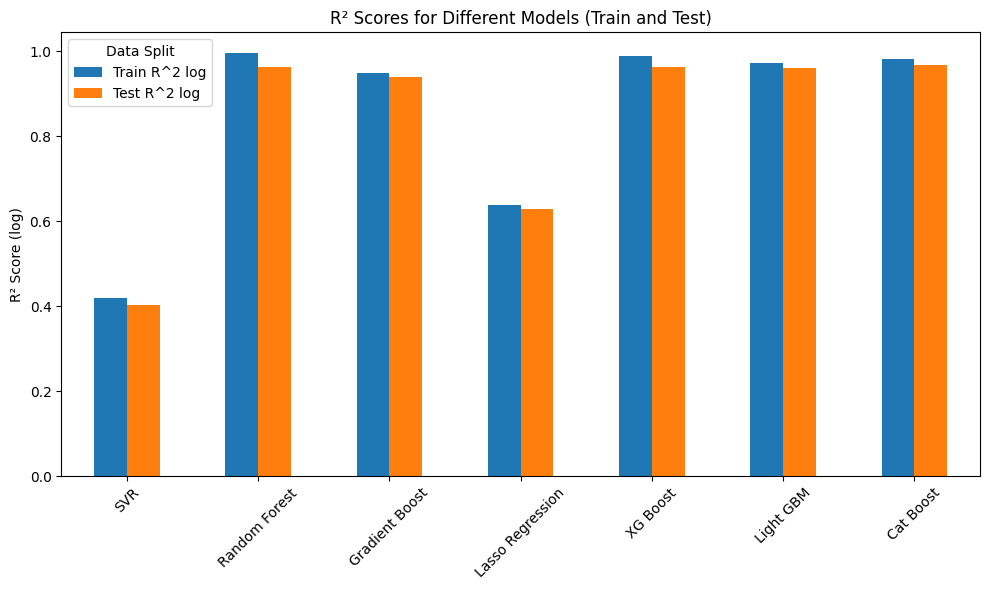

<Figure size 1000x600 with 0 Axes>

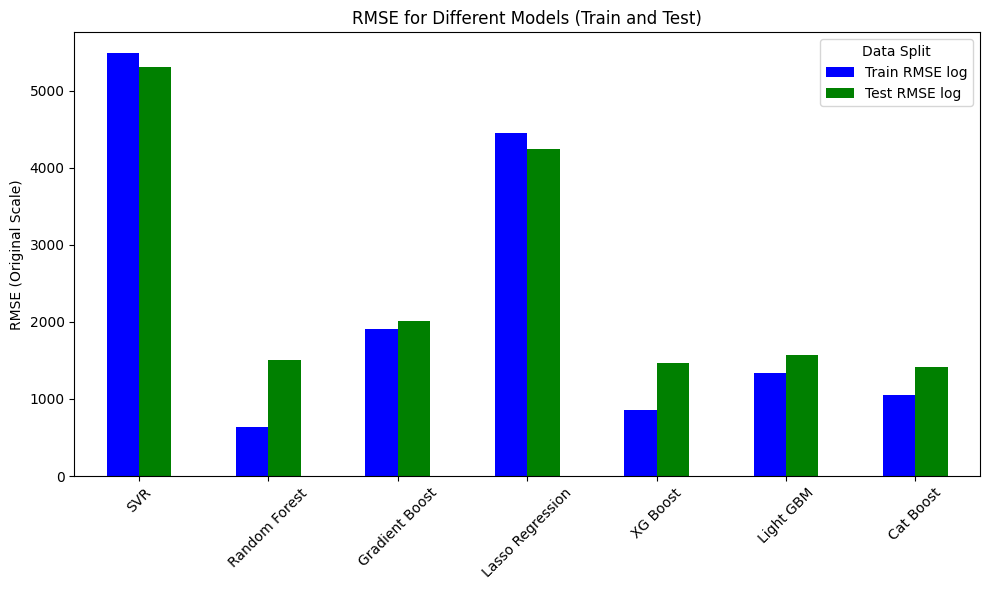

In [15]:
# Create a DataFrame for R² and RMSE metrics only
r2_df = results_logTarget[['Train R^2 log', 'Test R^2 log']]
rmse_df = results_logTarget[['Train RMSE log', 'Test RMSE log']]

# Plot for R² scores
plt.figure(figsize=(10, 6))
r2_df.plot(kind='bar', figsize=(10, 6))
plt.title('R² Scores for Different Models (Train and Test)')
plt.ylabel('R² Score (log)')
plt.xticks(rotation=45)
plt.legend(title="Data Split")
plt.tight_layout()  # To ensure labels don't overlap
plt.show()

# Plot for RMSE scores
plt.figure(figsize=(10, 6))
rmse_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'green'])
plt.title('RMSE for Different Models (Train and Test)')
plt.ylabel('RMSE (Original Scale)')
plt.xticks(rotation=45)
plt.legend(title="Data Split")
plt.tight_layout()
plt.show()

SVR performing poorly (although much better with logTarget than untransformed)
Try to fine-tune this model first

In [16]:
# # Create a pipeline with scaling
# pipe = make_pipeline(StandardScaler(), SVR())

# # Define the parameter grid
# param_grid = {
#     'svr__kernel': ['rbf', 'linear', 'poly'],
#     'svr__C': [0.1, 1, 10, 100],
#     'svr__gamma': [0.01, 0.1, 1, 10],
#     'svr__epsilon': [0.01, 0.1, 0.5, 1]
# }

# from sklearn.model_selection import RandomizedSearchCV

# # Perform randomized search with cross-validation
# randomized_search = RandomizedSearchCV(pipe, param_grid, n_iter=20, cv=3, scoring='r2', verbose=1)
# randomized_search.fit(X_train, y_train_log)

# ## Access the results
# results = randomized_search.cv_results_

# # Print the best parameters and score
# print("Best Parameters:", randomized_search.best_params_)
# print("Best R2 Score (Validation):", randomized_search.best_score_)


Compare training speed for XGBoost and RF

In [17]:
import time
rf =  RandomForestRegressor()
xgb = XGBRegressor()

# Measure time for Random Forest training
start_time_rf = time.time()
rf.fit(X_train, y_train_log)
end_time_rf = time.time()
rf_training_time = end_time_rf - start_time_rf

# Measure time for XGBoost training
start_time_xgb = time.time()
xgb.fit(X_train, y_train_log)
end_time_xgb = time.time()
xgb_training_time = end_time_xgb - start_time_xgb

# Print the training times
print(f"Random Forest training time: {rf_training_time:.4f} seconds")
print(f"XGBoost training time: {xgb_training_time:.4f} seconds")

Random Forest training time: 27.1776 seconds
XGBoost training time: 0.2329 seconds


Both quite fast? XGBoost slightly better performing and quicker to train (even though trees are trained sequencially rather than in parallel, shouldn't this make it slower to train than RF?), try to tune XGBoost to see if I can get even better performance

XGBoost has lots of params to tune! Can still do gridsearch across these as training time only 0.2 secs

In [18]:
# this gridsearch takes a while to run (>15min), don't run it every time we run the notebook
run_gridsearch = False # set to True whe you want to run gridsearch

xgb = XGBRegressor()
param_grid = {
    'n_estimators': [200, 300, 500],        # no of boosting rounds (trees), generally 500 upper limit? can get overfitting with more trees
    'learning_rate': [0.01, 0.05, 0.1],     
    'max_depth': [5, 7, 10],                 # this dataset quite big so deeper tree better?
    'subsample': [0.7, 0.8, 1.0],           # fraction of samples used to grow each tree. values between 0.7 and 1 commonly tested
    'colsample_bytree': [0.7, 0.8, 1.0],    # fraction of features used to grow each tree 
    'gamma': [0, 0.1, 0.2],                 # min loss reduction required to make a split
    'min_child_weight': [1, 2, 3],          # min number of samples needed in each leaf
}
if run_gridsearch:
   
    grid_search = GridSearchCV(estimator = xgb, param_grid= param_grid,
                           cv = 3, verbose = 1, n_jobs=-1)
    grid_search.fit(X_train, y_train_log)
    
    # Save the best parameters to avoid rerunning
    with open('best_params.json', 'w') as f:
        json.dump(grid_search.best_params_, f)
else:
    # Load the best parameters if grid search is skipped
    with open('best_params.json', 'r') as f:
        best_params = json.load(f)
    
    print("Loaded best params:", best_params)

print(f"Best Parameters: {best_params}")



Loaded best params: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 500, 'subsample': 0.8}
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 500, 'subsample': 0.8}


In [19]:
xgb_model = XGBRegressor(colsample_bytree = 0.7, gamma = 0, learning_rate = 0.05, max_depth = 7, min_child_weight = 2, n_estimators = 500, subsample = 0.8)

xgb_model.fit(X_train, y_train_log)
# make predictions on the training data and the test data
y_train_pred_log = xgb_model.predict(X_train)
y_test_pred_log = xgb_model.predict(X_test)
# Inverse log transform the predictions and the true values to original scale, so can compare RMSE values across log and non-transformed target variable
y_train_pred_original = np.exp(y_train_pred_log)
y_test_pred_original = np.exp(y_test_pred_log)
y_train_original = np.exp(y_train_log)
y_test_original = np.exp(y_test_log)
# Gather evaluation metrics mean_squared_error and r2_score on both train and test datasets
train_r2 = r2_score(y_train_log, y_train_pred_log)
test_r2 = r2_score(y_test_log, y_test_pred_log)
train_MSE = mean_squared_error(y_train_original, y_train_pred_original)
test_MSE = mean_squared_error(y_test_original, y_test_pred_original)
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)

results = {
        'Train R^2':train_r2,
        'Test R^2':test_r2,
        'Train RMSE':train_RMSE,
        'Test RMSE': test_RMSE
    }

In [20]:
XGB_tuned = pd.DataFrame(results, index=['XGBoost'])
XGB_tuned

,Train R^2,Test R^2,Train RMSE,Test RMSE
XGBoost,0.992886,0.969465,659.362743,1384.558161


Performance is very good but model is still overfitting a little bit. Could decrease learning rate, and/or increase min_child_rate, gains likely to be quite small

Best result I can find using XGBoost is R^2 0.969, RMSE = $1385

Generate some basic plots looking at predictions vs observed

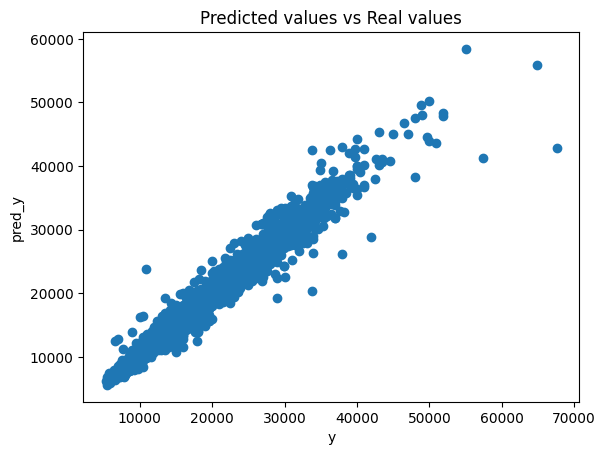

In [21]:
# Look at predicted values plotted against real values
plt.scatter(y_test, y_test_pred_original)
plt.xlabel('y')
plt.ylabel('pred_y')
plt.title('Predicted values vs Real values')
plt.show()

Generally looks like predictions are good, doesn't seem to be any obvious bias for different values (although looks like model is underpredicting some of the more expense cars, and overpredicting price of some of the cheapest cars). Can look at residuals to see this more clearly:

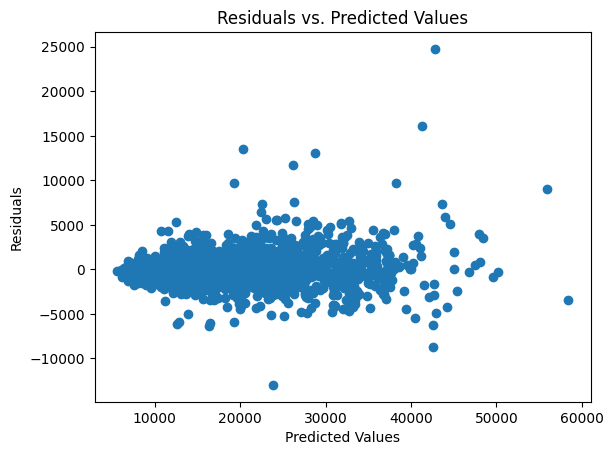

In [22]:
# Examine residuals
# Residuals
residuals = y_test - y_test_pred_original

# Residuals vs. Predicted
plt.scatter(y_test_pred_original, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

Predictions are generally scattered randomly around 0, more deviation for the more expensive cars (biggest mistakes are where model underpredict them)

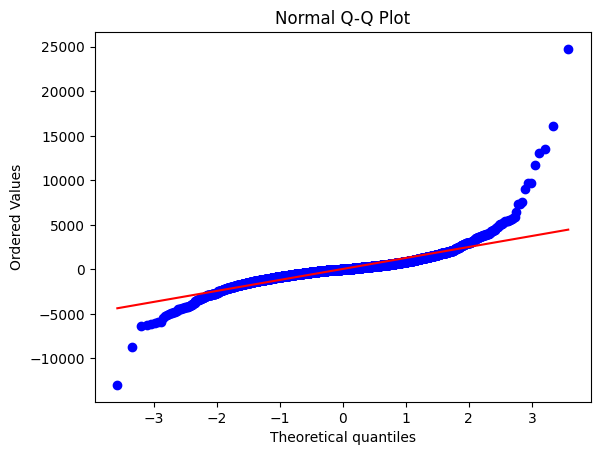

In [23]:
# Q-Q Plot (quantile-quantile plot) to look at the distribution of our residuals compared to normal distribution
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

Are my residuals normally distributed? Middle part ~-2 to ~2 follow theoretical normal distribtion nicely, but there are heavy tails - more extreme low values and high values than expcted under a normal distribution.

Have a look at feature importance using in-built xgb.feature_importance()
Look at 'gain' first: Gain represents the improvement in accuracy (or reduction in error) brought by a feature when it is used to split the data (effectiveness). Gain probably most important metric for XGBoost. Weight measures number of times a feature is used to split the data across all trees in the model (frequency). Cover measures the number of samples impacted by a feature's splits (scoope of influence of the feature)

In [24]:
# Get feature importance scores for all features, get gain, weight and cover measures
gain_importances = xgb_model.get_booster().get_score(importance_type='gain')
weight_importances = xgb_model.get_booster().get_score(importance_type='weight')
cover_importances = xgb_model.get_booster().get_score(importance_type='cover')


# store the dictionaries of raw feature importance values in a df
gain_df = pd.DataFrame({
    'Feature': list(gain_importances.keys()),
    'gain_importance': list(gain_importances.values())
})
weight_df = pd.DataFrame({
    'Feature': list(weight_importances.keys()),
    'weight_importance': list(weight_importances.values())
})
cover_df = pd.DataFrame({
    'Feature': list(cover_importances.keys()),
    'cover_importance': list(cover_importances.values())
})
xgb_feature_importance = pd.merge(gain_df, weight_df, on = 'Feature', how ='outer')
xgb_feature_importance = pd.merge(xgb_feature_importance, cover_df, on = 'Feature', how = 'outer')

In [25]:
# Have a look at top 20 features by gain importance
top20 = xgb_feature_importance.sort_values(by= 'gain_importance',ascending = False)[:20]
top20.head()

,Feature,gain_importance,weight_importance,cover_importance
78,hp,4.488245,1607.0,1653.946533
98,make_model_Renault Espace,3.024802,144.0,1479.694458
72,gears,2.138797,459.0,1518.662354
3,age,1.890445,1204.0,879.112976
92,make_model_Audi A3,1.491278,234.0,1329.111084


Text(0.5, 1.0, 'Cover importance')

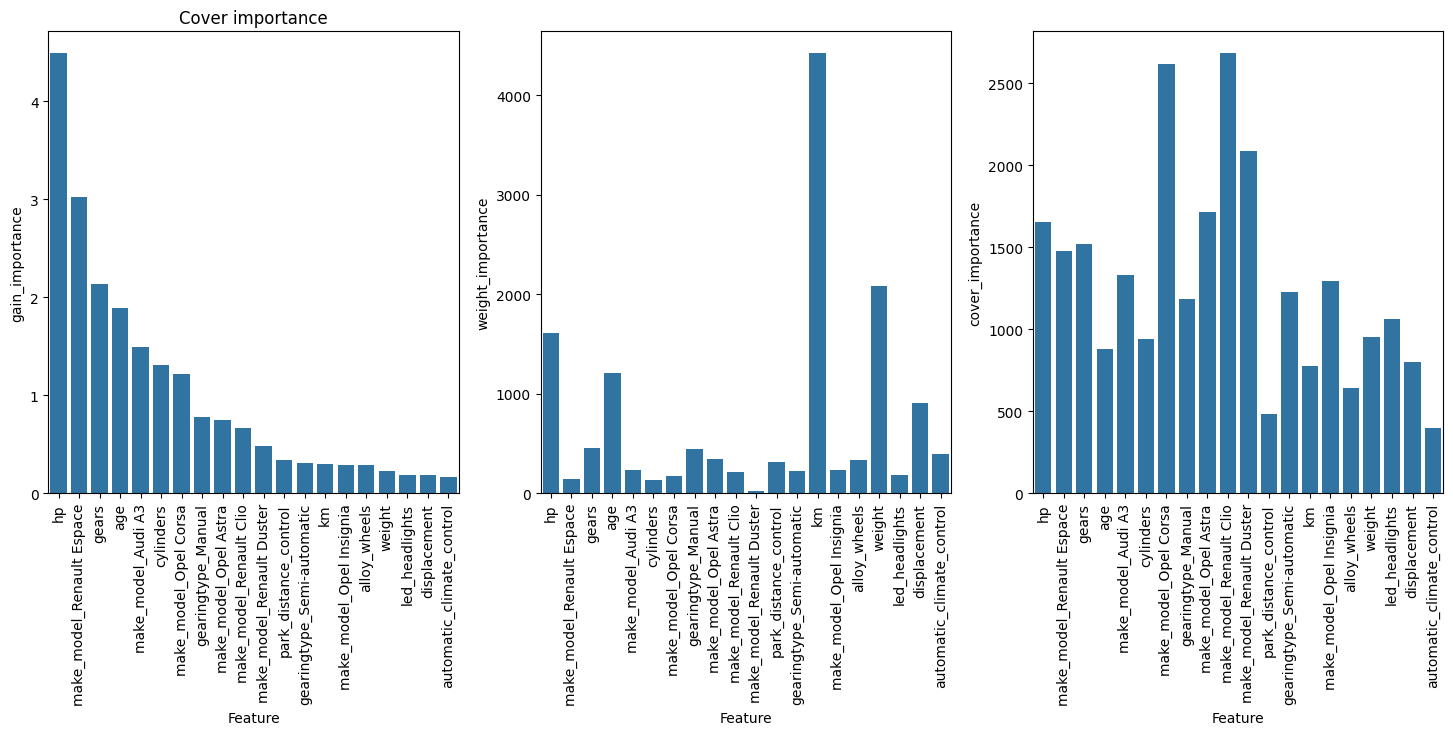

In [26]:
# Plot barplots of the three metrics, sorted by gain_importance
fig, axes = plt.subplots(1,3, figsize = (18,6))

# plot the gain_importance
sns.barplot(x = 'Feature', y = 'gain_importance', data = top20, ax = axes[0])
axes[0].tick_params(axis='x', rotation=90)  
axes[0].set_title('Gain importance')

sns.barplot(x = 'Feature', y = 'weight_importance', data = top20, ax = axes[1])
axes[1].tick_params(axis='x', rotation=90)  
axes[0].set_title('Weight importance')

sns.barplot(x = 'Feature', y = 'cover_importance', data = top20, ax = axes[2])
axes[2].tick_params(axis='x', rotation=90)  
axes[0].set_title('Cover importance')



Looks like hp most effective predictor of car price. km affects the most number of splits, 

## fine tune a Random Forest model, see whether we can do any better

In [30]:
run_gridsearch = False# set to True whe you want to run gridsearch

# Instantiate the model
rf = RandomForestRegressor(random_state=42)
# Define the parameter grid
param_grid = {
    'n_estimators': [500],              # Number of trees to try. More almost always better, although returns tiny after 500 or so
    'max_depth': [10, 20, 30, None],              # Max depth, 'None' means nodes are expanded until all leaves are pure
    'min_samples_split': [2, 5, 10],              # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2'],     # Number of features to consider at each split
    'bootstrap': [True, False]                    # Whether to use bootstrap samples
}

# Set up the grid search
if run_gridsearch:
    grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Evaluation metric
    verbose=2,
    n_jobs=-1            # Use all cores for parallel processing
)
    # Fit the model to the data
    grid_search.fit(X_train, y_train_log)

     # Save the best parameters to avoid rerunning
    with open('best_params.json', 'w') as f:
        json.dump(grid_search.best_params_, f)
else:
    # Load the best parameters if grid search is skipped
    with open('best_params.json', 'r') as f:
        best_params = json.load(f)
    
    print("Loaded best params:", best_params)

# If running gridsearch, print the best params found
if run_gridsearch:
    print(f"Best Parameters: {grid_search.best_params_}")

Loaded best params: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [76]:
#instantiate model with opimised params
rf_model_ft = RandomForestRegressor(bootstrap = False, max_depth = None, max_features= 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500)

# train the model
rf_model_ft.fit(X_train, y_train_log)
# make predictions on the training data and the test data
y_train_pred_log = rf_model_ft.predict(X_train)
y_test_pred_log = rf_model_ft.predict(X_test)
# Inverse log transform the predictions and the true values to original scale, so can compare RMSE values across log and non-transformed target variable
y_train_pred_original = np.exp(y_train_pred_log)
y_test_pred_original = np.exp(y_test_pred_log)
y_train_original = np.exp(y_train_log)
y_test_original = np.exp(y_test_log)
# Gather evaluation metrics mean_squared_error and r2_score on both train and test datasets
train_r2 = r2_score(y_train_log, y_train_pred_log)
test_r2 = r2_score(y_test_log, y_test_pred_log)
train_MSE = mean_squared_error(y_train_original, y_train_pred_original)
test_MSE = mean_squared_error(y_test_original, y_test_pred_original)
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)

results = {
        'Train R^2':train_r2,
        'Test R^2':test_r2,
        'Train RMSE':train_RMSE,
        'Test RMSE': test_RMSE
    }

In [77]:
rf_tuned_results = pd.DataFrame(results, index=['Random Forest'])
rf_tuned_results

,Train R^2,Test R^2,Train RMSE,Test RMSE
Random Forest,0.99979,0.957806,144.739057,1683.398336


In [ ]:
# Fine-tuned models params and comparisons
xgb_model_ft = XGBRegressor(colsample_bytree = 0.7, gamma = 0, learning_rate = 0.05, max_depth = 7, min_child_weight = 2, n_estimators = 500, subsample = 0.8)
rf_model_ft = RandomForestRegressor(bootstrap = False, max_depth = None, max_features= 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500)

In [61]:
# Best hyperparameters from grid search
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
